In [80]:
# ok first some imports
import pyvis as pv 
import networkx as nx 
import pandas as pd
import requests
import scipy
from textblob import TextBlob
from bs4 import BeautifulSoup
from pyvis.network import Network
import random

import matplotlib.pyplot as plt
from textblob import Word

import requests
import os
import re
import numpy as np
import gensim
import gensim.corpora as corpora

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from pprint import pprint
from bs4 import BeautifulSoup
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sathishkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sathishkumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Functions for graphing

In [122]:
def add_edges_rey(graph, edges):
    """
    This method serves to add multiple edges between existing nodes
    in the network instance. Adding of the edges is done based off
    of the IDs of the nodes. Order does not matter unless dealing with a
    directed graph.

    :param edges: A list of tuples, each tuple consists of source of edge,
                  edge destination and and optional width.

    :type arrowStrikethrough: list of tuples
    """
    for edge in edges:
        # if incoming tuple contains a weight
        if len(edge) == 3:
            graph.add_edge(edge[0], edge[1], color=edge[2], arrows = "hi")
        else:
            graph.add_edge(edge[0], edge[1])


def connect_edges(edges_list, graph, color):
    if (len(edges_list) > 9):
        edges_list = random.sample(edges_list, 7)
    connect_list = [(story1, story2, color) for story1 in edges_list for story2 in edges_list if story1!=story2 and story1<story2]
    print(connect_list)
    add_edges_rey(graph, connect_list)
    

In [87]:
main_graph.get_edges()

[{'color': 'blue', 'arrows': 'hi', 'from': 30, 'to': 26},
 {'color': 'blue', 'arrows': 'hi', 'from': 64, 'to': 30},
 {'color': 'blue', 'arrows': 'hi', 'from': 64, 'to': 26},
 {'color': 'blue', 'arrows': 'hi', 'from': 64, 'to': 51},
 {'color': 'blue', 'arrows': 'hi', 'from': 68, 'to': 30},
 {'color': 'blue', 'arrows': 'hi', 'from': 68, 'to': 64},
 {'color': 'blue', 'arrows': 'hi', 'from': 68, 'to': 26},
 {'color': 'blue', 'arrows': 'hi', 'from': 68, 'to': 51},
 {'color': 'blue', 'arrows': 'hi', 'from': 51, 'to': 30},
 {'color': 'blue', 'arrows': 'hi', 'from': 51, 'to': 26},
 {'color': 'green', 'arrows': 'hi', 'from': 30, 'to': 3},
 {'color': 'green', 'arrows': 'hi', 'from': 30, 'to': 17},
 {'color': 'green', 'arrows': 'hi', 'from': 30, 'to': 19},
 {'color': 'green', 'arrows': 'hi', 'from': 17, 'to': 3},
 {'color': 'green', 'arrows': 'hi', 'from': 19, 'to': 3},
 {'color': 'green', 'arrows': 'hi', 'from': 19, 'to': 17},
 {'color': 'red', 'arrows': 'hi', 'from': 30, 'to': 17},
 {'color': '

Functions for text analysis

In [106]:
def clean_story(URL):

    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")

    results = soup.find(id="container")
    main_text = results.find_all("p")
    storyteller = results.find_all("h3")
    storyteller_clean = []

    full_story = ""
    for element in main_text:
        clean_element = element.text.strip()
        clean_element = re.sub(r'[0-9]+', '', clean_element)
        clean_element = re.sub(r'\[|\]|\t|\n', '', clean_element)
        full_story += clean_element
    
    for element in storyteller:
        clean_element = element.text.strip()
        clean_element = re.sub(r'[0-9]+', '', clean_element)
        clean_element = re.sub(r'\[|\]|\t|\n', '', clean_element)
        clean_element = re.sub(r'Voice:', '', clean_element)
        clean_element.replace(" ", "")
        storyteller_clean.append(clean_element)
    
    storyteller_name = max(set(storyteller_clean), key=storyteller_clean.count)

    return full_story, storyteller_name

def two_digit(digit):
    if (digit < 10):
        digit = f"0{digit}"
    return str(digit)

def return_URL(day, story):
    story = two_digit(story)
    day = two_digit(day)
    URL = f"https://www.brown.edu/Departments/Italian_Studies/dweb/texts/DecShowText.php?myID=nov{day}{story}&lang=eng"
    return URL

def analyze_story():
    #TODO
    return

## Graphing

### Colors and Dictionaries

In [72]:
# creating storytellers colors
storytellers = {
    "panfilo" : "#9e0142",
    "neifile" : "#d53e4f",
    "filomena" : "#f46d43",
    "dioneo" : "#fdae61",
    "fiammetta" : "#fee08b",
    "emilia" : "#e6f598",
    "filostrato" : "#abdda4",
    "lauretta" : "#66c2a5",
    "elissa" : "#3288bd",
    "pampinea" : "#5e4fa2"
}

# themes

THEMES = ["Storytelling", "Cultural_Exchange", "Sexuality", "Queer", "Gender_Power", "Religious_Critique"]
theme_dict = {}
color_coding = {
    "Storytelling" : "blue",
    "Cultural_Exchange" : "green",
    "Sexuality" : "red",
    "Queer": "purple",
    "Gender_Power": "orange",
    "Religious_Critique": "pink"
}

In [136]:
## ACTUAL STUFF
# read in data and create graph
df = pd.read_csv("decameron_themes.csv")
main_graph = Network(height = "1500px", width = "100%", directed = True)
main_graph.set_edge_smooth("dynamic")

for index, row in df.iterrows():

    # this adds nodes to the graphs of each of the storytellers
    day = row["Day"]
    story = row["Story"]
    URL = return_URL(day, story)
    main_graph.add_node(row["Story_Hash"], label = f"Day {day}, Story {story}", color = storytellers[row["Storyteller"]], title=f'<a href=\'{URL}\'>Read Story</a>', size = 20)



# creating theme lists
for theme in THEMES:
    theme_dict[theme] = df.loc[df[theme] == True]["Story_Hash"].tolist()
    connect_edges(theme_dict[theme], main_graph, color_coding[theme])


## OK LETS SEE THIS
main_graph.barnes_hut(spring_length = 1)
main_graph.show_buttons()
main_graph.show("hello.html", width = "75%")

[(19, 78, 'blue'), (19, 64, 'blue'), (19, 30, 'blue'), (19, 26, 'blue'), (19, 67, 'blue'), (64, 78, 'blue'), (64, 67, 'blue'), (17, 78, 'blue'), (17, 19, 'blue'), (17, 64, 'blue'), (17, 30, 'blue'), (17, 26, 'blue'), (17, 67, 'blue'), (30, 78, 'blue'), (30, 64, 'blue'), (30, 67, 'blue'), (26, 78, 'blue'), (26, 64, 'blue'), (26, 30, 'blue'), (26, 67, 'blue'), (67, 78, 'blue')]
[(3, 30, 'green'), (3, 17, 'green'), (3, 19, 'green'), (17, 30, 'green'), (17, 19, 'green'), (19, 30, 'green')]
[(67, 78, 'red'), (26, 67, 'red'), (26, 78, 'red'), (26, 32, 'red'), (26, 30, 'red'), (26, 50, 'red'), (32, 67, 'red'), (32, 78, 'red'), (32, 50, 'red'), (30, 67, 'red'), (30, 78, 'red'), (30, 32, 'red'), (30, 50, 'red'), (50, 67, 'red'), (50, 78, 'red'), (21, 67, 'red'), (21, 78, 'red'), (21, 26, 'red'), (21, 32, 'red'), (21, 30, 'red'), (21, 50, 'red')]
[(19, 50, 'purple'), (13, 19, 'purple'), (13, 50, 'purple')]
[(30, 67, 'orange'), (30, 64, 'orange'), (17, 30, 'orange'), (17, 19, 'orange'), (17, 21, 

In [93]:
print(main_graph.neighbors(51))

set()


## Text Analysis

In [13]:
# this creates a 2d array of all the stories
stories_all = []
storytellers_all = []
for day in np.arange(1, 11, 1):
    day_stories = []
    day_storytellers = []
    for story in np.arange(1, 11, 1):
        print(f"Currently Scraping: Day {day}, Story {story}")
        story, storyteller = clean_story(return_URL(day, story))
        day_stories.append(story)
        day_storytellers.append(storyteller[1:])
    stories_all.append(day_stories)
    storytellers_all.append(day_storytellers)
    print(storytellers_all)

Currently Scraping: Day 1, Story 1
 panfilo
Currently Scraping: Day 1, Story 2
 neifile
Currently Scraping: Day 1, Story 3
 filomena
Currently Scraping: Day 1, Story 4
 dioneo
Currently Scraping: Day 1, Story 5
 fiammetta
Currently Scraping: Day 1, Story 6
 emilia
Currently Scraping: Day 1, Story 7
 filostrato
Currently Scraping: Day 1, Story 8
 lauretta
Currently Scraping: Day 1, Story 9
 elissa
Currently Scraping: Day 1, Story 10
 pampinea
[['panfilo', 'neifile', 'filomena', 'dioneo', 'fiammetta', 'emilia', 'filostrato', 'lauretta', 'elissa', 'pampinea']]
Currently Scraping: Day 2, Story 1
 neifile
Currently Scraping: Day 2, Story 2
 filostrato
Currently Scraping: Day 2, Story 3
 pampinea
Currently Scraping: Day 2, Story 4
 lauretta
Currently Scraping: Day 2, Story 5
 fiammetta
Currently Scraping: Day 2, Story 6
 emilia
Currently Scraping: Day 2, Story 7
 panfilo
Currently Scraping: Day 2, Story 8
 elissa
Currently Scraping: Day 2, Story 9
 filomena
Currently Scraping: Day 2, Story 1

In [13]:
#pprint(lda_model.print_topics())

[(0,
  '0.008*"lady" + 0.006*"would" + 0.005*"might" + 0.004*"love" + 0.004*"time" '
  '+ 0.004*"made" + 0.004*"great" + 0.004*"man" + 0.004*"well" + 0.004*"come"'),
 (1,
  '0.000*"lady" + 0.000*"would" + 0.000*"well" + 0.000*"might" + 0.000*"love" '
  '+ 0.000*"man" + 0.000*"wherefore" + 0.000*"good" + 0.000*"made" + '
  '0.000*"upon"'),
 (2,
  '0.000*"would" + 0.000*"might" + 0.000*"man" + 0.000*"lady" + 0.000*"messer" '
  '+ 0.000*"made" + 0.000*"well" + 0.000*"time" + 0.000*"upon" + 0.000*"love"'),
 (3,
  '0.000*"lady" + 0.000*"would" + 0.000*"made" + 0.000*"love" + 0.000*"great" '
  '+ 0.000*"might" + 0.000*"wherefore" + 0.000*"never" + 0.000*"man" + '
  '0.000*"may"'),
 (4,
  '0.010*"messer" + 0.006*"king" + 0.006*"lady" + 0.006*"torello" + '
  '0.006*"made" + 0.005*"love" + 0.005*"would" + 0.005*"might" + 0.005*"wife" '
  '+ 0.004*"great"'),
 (5,
  '0.007*"man" + 0.006*"god" + 0.006*"would" + 0.005*"ciappelletto" + '
  '0.005*"ser" + 0.005*"great" + 0.004*"good" + 0.004*"thus" +

## Sentiment Analysis  

In [36]:
print(stories_all)

[[" Ser Ciappelletto cheats a holy friar by a false confession,and dies; and, having lived as a very bad man,is, on his death, reputed a saint, and called SanCiappelletto. A seemly thing it is, dearest ladies, that whatever we do, it be      begun      in the holy and awful name of Him who was the maker of all. Wherefore,      as it falls to me to lead the way in this your enterprise of storytelling,      I intend to begin with one of His wondrous works, that, by      hearing thereof, our hopes in Him, in whom is no change, may be      established, and His name be by us forever lauded.  'Tis manifest      that, as things temporal are all doomed to pass and perish, so within      and without they abound with trouble and anguish and travail, and      are subject to infinite perils; nor, save for the especial grace of God,      should we, whose being is bound up with and forms part of theirs,      have either the strength to endure or the wisdom to combat their      adverse influences.  B

In [14]:
full_sents = []
for day in stories_all:
    day_sents = []
    for story in day:
        story_blob = TextBlob(story)
        polarity = story_blob.sentiment.polarity
        day_sents.append(polarity)
    full_sents.append(day_sents)

In [40]:
print(full_sents)

[[0.10452803379416283, 0.2319151334776336, 0.2548289545703339, 0.14140901727535385, 0.20333655083655086, 0.22433673469387755, 0.2024587675698788, 0.2127026927874385, -0.007236842105263167, 0.24314971751412431], [0.10206759715380406, 0.11987387524011728, 0.18299268439893446, 0.162280115242444, 0.1431795221299596, 0.19625197479723355, 0.16248751248751256, 0.16338053116850781, 0.15413023540374646, 0.1889275544195757], [0.07052609047071066, 0.1434222500983864, 0.16134815253398904, 0.2577495691037357, 0.21067602889459186, 0.1873690275612347, 0.1725674167644554, 0.16006004990379988, 0.23034813204416738, 0.18999608073682142], [0.1519762441320986, 0.20307258917553042, 0.18467358898962677, 0.24726053639846757, 0.1153371051390853, 0.23297170256991695, 0.15336723686238252, 0.15946751230136325, 0.22283933080808085, 0.10332107155941354], [0.2071538426094501, 0.21182401547116744, 0.19428367003367, 0.2506565806878307, 0.19503122560499606, 0.13554336616836618, 0.17234723609723604, 0.13808598659405108,

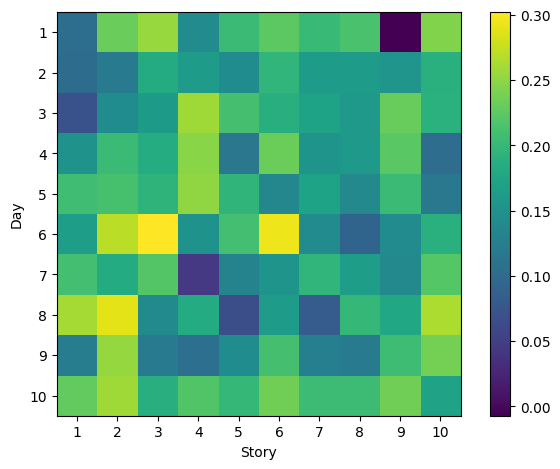

In [60]:
# Generate all possible combinations of True and False for size 3
story_valences = full_sents
# Convert the combinations to NumPy arrays

# Plot the array as a colormap
plt.imshow(story_valences, cmap='viridis') 

# Add a colorbar for reference
plt.colorbar()

# Show the plot
tick_list = np.arange(1, 11, 1)
plt.xticks(np.arange(10), tick_list)
plt.yticks(np.arange(10), tick_list)
plt.xlabel("Story")
plt.ylabel("Day")
plt.tight_layout()
plt.savefig('full_sentiments') 
plt.show()

In [104]:
print(storytellers_all)

['pampinea', 'dioneo', 'dioneo', 'dioneo', 'dioneo', 'dioneo', 'dioneo', 'dioneo', 'dioneo', 'dioneo']


In [35]:
# creating list of who told which stories

storyteller_names = ["panfilo", "neifile", "filomena", "dioneo", "fiammetta", "emilia", "filostrato", "lauretta", "elissa", "pampinea"]
storyteller_list_all = []
for storyteller in storyteller_names:
    storyteller_list = []
    for x in range(0, 10):
        for y in range(0, 10):
            if storytellers_all[x][y] == storyteller:
                storyteller_list.append((x, y))
    storyteller_list_all.append(storyteller_list)
# for some reason decameron web has this wrong so i'm hardcoding it 
storyteller_list_all[3] = [(0, 3), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
storyteller_list_all[4] = [(0, 4), (1, 4), (2, 5), (3, 0),(4, 8), (5, 5), (6, 4), (7, 7), (8, 4), (9, 5)]
print(storyteller_list_all[4])


[(0, 4), (1, 4), (2, 5), (3, 0), (4, 8), (5, 5), (6, 4), (7, 7), (8, 4), (9, 5)]


In [41]:
for key in color_coding.keys():
    print(key)

Storytelling
Cultural_Exchange
Sexuality
Gender_Bending


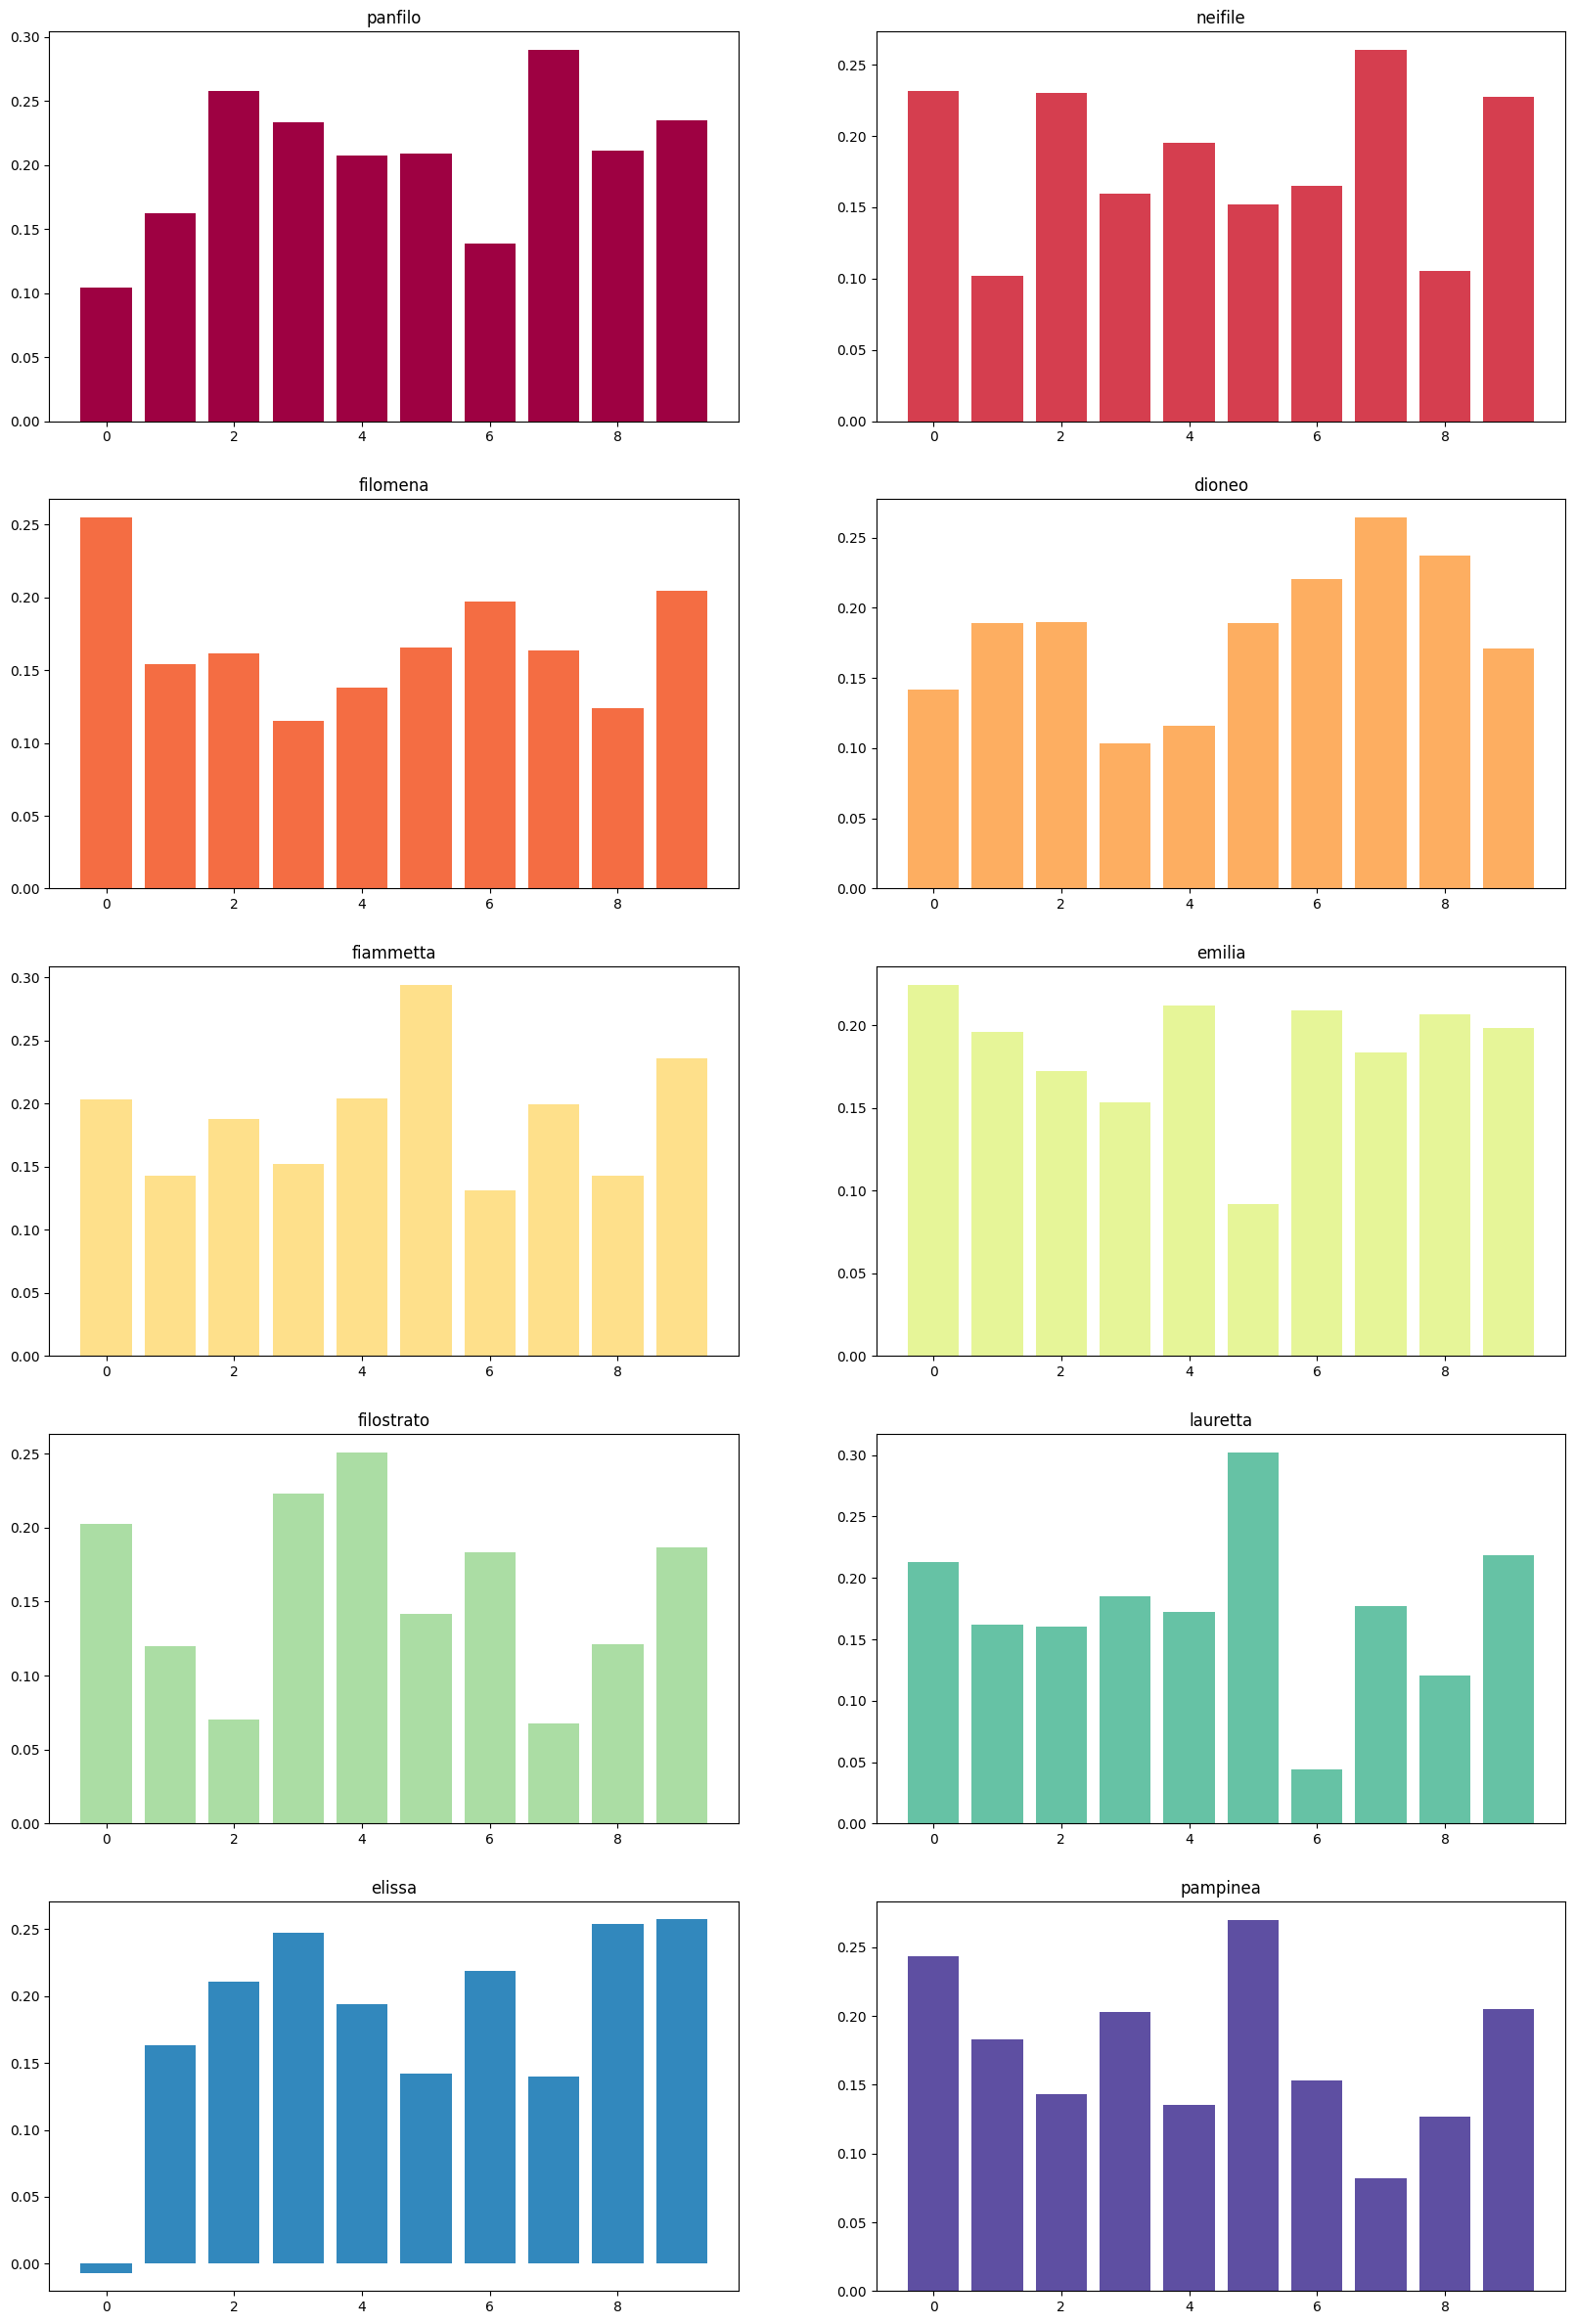

In [61]:
figure, axis = plt.subplots(5, 2, figsize =(20, 30))
i = 0

x, y = 0, 0

for storyteller in storyteller_list_all:
    curr_sent = []

    for story in storyteller:
        curr_sent.append(full_sents[story[0]][story[1]])
    
    axis[x][y].bar(range(0,10), curr_sent, color = storytellers[storyteller_names[i]])
    axis[x][y].set_title(storyteller_names[i])

    if(y == 1):
        y = 0
        x += 1
    else:
        y += 1
    i += 1
plt.tight_layout
plt.savefig("storytellersent.png", bbox_inches='tight')
plt.show()
    

[Synset('death.n.01'), Synset('death.n.02'), Synset('death.n.03'), Synset('death.n.04'), Synset('death.n.05'), Synset('death.n.06'), Synset('end.n.06'), Synset('death.n.08')]
